# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nitinprasad/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file /Users/nitinprasad/opt/anaconda3/envs/pyvizenv/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/nitinprasad/opt/anaconda3/envs/pyvizenv/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distrib

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")

btc_headlines

{'status': 'ok',
 'totalResults': 8592,
 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'},
   'author': 'Jeff Somers',
   'title': 'Is the Crypto Bubble Going to Burst?',
   'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
   'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
   'publishedAt': '2022-02-09T16:00:00Z',
   'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'},
  {'sou

In [5]:
# Fetch the Bitcoin news articles

btc_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")

# Print total articles
print(f"Total articles about BITCOIN: {btc_headlines['totalResults']}")

# Show sample article
btc_headlines["articles"][2]

Total articles about BITCOIN: 8592


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Mitchell Clark',
 'title': 'The International Monetary Fund tells El Salvador it shouldn’t use Bitcoin as legal tender',
 'description': 'The International Monetary Fund’s executive directors have recommended to El Salvador that it should narrow the scope of its Bitcoin law, making it so that the cryptocurrency is no longer legal tender in the country.',
 'url': 'https://www.theverge.com/2022/1/25/22901374/el-salvador-bitcoin-international-monetary-fund-crypto',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/altkKN7BnaLUpbAVPi6j4xmC2Ug=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/13546110/acastro_181126_1777_bitcoin_0001.jpg',
 'publishedAt': '2022-01-25T22:11:14Z',
 'content': 'El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 cha

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")

# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

# Show sample article
eth_headlines["articles"][0]

Total articles about Ethereum: 3959


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Corin Faife',
 'title': 'Crypto.com admits over $30 million stolen by hackers',
 'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
 'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2022-01-20T13:23:31Z',
 'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for barticle in btc_headlines["articles"]:
    try:
        btext = barticle["content"]
        bdate = barticle["publishedAt"][:10]
        bsentiment = analyzer.polarity_scores(btext)
        bcompound = bsentiment["compound"]
        bpos = bsentiment["pos"]
        bneu = bsentiment["neu"]
        bneg = bsentiment["neg"]
        
        btc_sentiments.append({
            "text": btext,
            "date": bdate,
            "compound": bcompound,
            "positive": bpos,
            "negative": bneg,
            "neutral": bneu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head(5)

,date,text,compound,positive,negative,neutral
0,2022-02-09,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
4,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for earticle in eth_headlines["articles"]:
    try:
        etext = earticle["content"]
        edate = earticle["publishedAt"][:10]
        esentiment = analyzer.polarity_scores(etext)
        ecompound = esentiment["compound"]
        epos = esentiment["pos"]
        eneu = esentiment["neu"]
        eneg = esentiment["neg"]
        
        eth_sentiments.append({
            "text": etext,
            "date": edate,
            "compound": ecompound,
            "positive": epos,
            "negative": eneg,
            "neutral": eneu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head(5)

,date,text,compound,positive,negative,neutral
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,2022-02-10,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.053230,0.058350,0.038800,0.902850
std,0.438868,0.060941,0.051888,0.058408
min,-0.709600,0.000000,0.000000,0.765000
25%,-0.426225,0.000000,0.000000,0.874750
50%,0.127550,0.048500,0.000000,0.912000
75%,0.366350,0.109750,0.085000,0.934000
max,0.680800,0.185000,0.169000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.133000,0.064100,0.022100,0.913800
std,0.331538,0.064006,0.045603,0.078963
min,-0.680800,0.000000,0.000000,0.775000
25%,0.000000,0.000000,0.000000,0.875500
50%,0.038600,0.048500,0.000000,0.913000
75%,0.406800,0.106000,0.011750,1.000000
max,0.757900,0.217000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Both, Bitcoin and Ethereum, are just marginally different but Bitcoin has the highest mean positive score.
    Bitcoin - 0.062550 and Ethereum - 0.062150

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nitinprasad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nitinprasad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
btc_headlines["articles"]

[{'source': {'id': None, 'name': 'Lifehacker.com'},
  'author': 'Jeff Somers',
  'title': 'Is the Crypto Bubble Going to Burst?',
  'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
  'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
  'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
  'publishedAt': '2022-02-09T16:00:00Z',
  'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'},
 {'source': {'id': 'wired', 'name': 'Wired'},
  'author': 'Gian M. 

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'returns', 'great', 'currency','money'}

In [14]:
btc_df

,date,text,compound,positive,negative,neutral
0,2022-02-09,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
4,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
5,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
6,2022-02-11,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
7,2022-01-22,"Bitcoin, the largest digital asset, extended i...",0.3612,0.068,0.000,0.932
8,2022-01-14,Block founder Jack Dorsey has announced on Twi...,-0.4404,0.000,0.083,0.917
9,2022-01-14,Tesla Inc (TSLA.O) will accept the meme-based ...,0.3818,0.073,0.000,0.927


In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]  
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return tokens


In [31]:
# Create Tokens for articles
btc_tokens = []
btoken = 0
for btoken in btc_headlines["articles"]:
    try:
        bcontent = btoken["content"]
        btc_processed = tokenizer(bcontent)
        
        btc_tokens.append(btc_processed)
    except AttributeError:
        pass
    
  

In [26]:
btc_combined = btc_tokens
#The best I can come up with is as follows.

result = []
[ result.extend(el) for el in btc_combined] 

for el in result:
  
  print (el)

btc_combined.append(el)

even
arent
paying
attention
bitcoin
cryptocurrencies
might
noticed
value
plummeted
last
week
total
value
market
tumbling
high
tr
char
denis
rusinovich
set
cryptocurrency
mining
company
maveric
group
kazakhstan
thought
hit
jackpot
next
door
china
russia
country
everything
bitcoin
char
el
salvador
introduced
bitcoin
legal
tender
alongside
us
dollar
illustration
alex
castro
verge
international
monetary
funds
executive
board
ha
recommended
el
char
officially
building
open
bitcoin
mining
systemphoto
joe
raedlegetty
imagesblock
payment
company
formerly
known
square
working
building
open
bitcoin
mining
system
char
israeli
national
tal
prihar
pled
guilty
routing
money
kickback
bitcoin
shell
company
illustration
alex
castro
vergein
culmination
twoyear
legal
process
char
new
blog
post
company
said
eth
bitcoin
takenillustration
alex
castro
vergein
blog
post
published
early
hour
thursday
morning
cryptocurrency
char
netflix
making
docuseries
one
worst
rapper
time
coincidentally
heather
razzlekhan
m

In [35]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_tokens

btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-09,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, bitcoin, cryp..."
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
4,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."


In [36]:
#Combine token list from Dataframe
btc_token_list = btc_df["tokens"]
btc_token_list

import itertools
combined_btc_token_list = itertools.chain(btc_token_list)
print(list(combined_btc_token_list))

[['even', 'arent', 'paying', 'attention', 'bitcoin', 'cryptocurrencies', 'might', 'noticed', 'value', 'plummeted', 'last', 'week', 'total', 'value', 'market', 'tumbling', 'high', 'tr', 'char'], ['denis', 'rusinovich', 'set', 'cryptocurrency', 'mining', 'company', 'maveric', 'group', 'kazakhstan', 'thought', 'hit', 'jackpot', 'next', 'door', 'china', 'russia', 'country', 'everything', 'bitcoin', 'char'], ['el', 'salvador', 'introduced', 'bitcoin', 'legal', 'tender', 'alongside', 'us', 'dollar', 'illustration', 'alex', 'castro', 'verge', 'international', 'monetary', 'funds', 'executive', 'board', 'ha', 'recommended', 'el', 'char'], ['officially', 'building', 'open', 'bitcoin', 'mining', 'systemphoto', 'joe', 'raedlegetty', 'imagesblock', 'payment', 'company', 'formerly', 'known', 'square', 'working', 'building', 'open', 'bitcoin', 'mining', 'system', 'char'], ['israeli', 'national', 'tal', 'prihar', 'pled', 'guilty', 'routing', 'money', 'kickback', 'bitcoin', 'shell', 'company', 'illustr

In [37]:
# Complete the tokenizer function
def etokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]  
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return tokens


In [38]:
# Create Tokens for articles
eth_tokens = []
etoken = 0
for etoken in eth_headlines["articles"]:
    try:
        econtent = etoken["content"]
        eth_processed = etokenizer(econtent)
        
        eth_tokens.append({
            "tokens": eth_processed
             
        })
    except AttributeError:
        pass   

In [39]:
# Create a new tokens column for Ethereum
eth_df["tokens"]=eth_tokens

eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"{'tokens': ['new', 'blog', 'post', 'company', ..."
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"{'tokens': ['hackers', 'made', 'roughly', 'mil..."
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"{'tokens': ['level', 'new', 'mayor', 'simply',..."
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"{'tokens': ['back', 'september', 'robinhood', ..."
4,2022-02-10,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"{'tokens': ['people', 'buy', 'cryptocurrencies..."


In [40]:
#Combine token list from Dataframe
eth_token_list = eth_df["tokens"]
eth_token_list

import itertools
combined_eth_token_list = itertools.chain(eth_token_list)
abc = list(combined_eth_token_list)
print(abc)

[{'tokens': ['new', 'blog', 'post', 'company', 'said', 'eth', 'bitcoin', 'takenillustration', 'alex', 'castro', 'vergein', 'blog', 'post', 'published', 'early', 'hour', 'thursday', 'morning', 'cryptocurrency', 'char']}, {'tokens': ['hackers', 'made', 'roughly', 'million', 'ethereum', 'cryptocom', 'attempting', 'launder', 'fund', 'socalled', 'ethereum', 'mixer', 'known', 'tornado', 'cash', 'according', 'new', 'report', 'char']}, {'tokens': ['level', 'new', 'mayor', 'simply', 'employing', 'ageold', 'political', 'strategy', 'making', 'overture', 'business', 'community', 'fintech', 'growing', 'field', 'new', 'york', 'city', 'blockchainbased', 'company', 'char']}, {'tokens': ['back', 'september', 'robinhood', 'announced', 'plan', 'test', 'cryptocurrency', 'wallet', 'within', 'app', 'time', 'company', 'said', 'would', 'open', 'beta', 'small', 'number', 'people', 'expanding', 'availa', 'char']}, {'tokens': ['people', 'buy', 'cryptocurrencies', 'intended', 'hold', 'speculative', 'investment', 

In [41]:
# display List of Tokens from sample article
print(eth_df.tokens[0])

{'tokens': ['new', 'blog', 'post', 'company', 'said', 'eth', 'bitcoin', 'takenillustration', 'alex', 'castro', 'vergein', 'blog', 'post', 'published', 'early', 'hour', 'thursday', 'morning', 'cryptocurrency', 'char']}


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [62]:
from collections import Counter
from nltk import ngrams

In [63]:
btcarticles = btc_df["text"]
etharticles = eth_df["text"]
# btcarticles

In [64]:


# # Generate the Bitcoin N-grams where N=2

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [65]:
# Define preprocess function
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [66]:
# # Generate the Bitcoin N-grams where N=2
bigram_counter(btcarticles)

,bigram,count
0,"(bitcoin, mining)",4
1,"(el, salvador)",3
2,"(alex, castro)",3
3,"(building, open)",3
4,"(open, bitcoin)",3
5,"(mining, system)",3
6,"(bitcoin, char)",2
7,"(alongside, us)",2
8,"(illustration, alex)",2
9,"(international, monetary)",2


In [67]:
# Generate the Ethereum N-grams where N=2
bigram_counter(etharticles)

,bigram,count
0,"(blog, post)",3
1,"(new, blog)",2
2,"(post, company)",2
3,"(company, said)",2
4,"(according, new)",2
5,"(char, crypto)",2
6,"(char, feb)",2
7,"(feb, reuters)",2
8,"(char, believers)",2
9,"(believers, open)",2


In [75]:
 # Define the counter function
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [76]:
word_counter(btcarticles)

,word,count
0,char,20
1,bitcoin,17
2,company,7
3,ha,7
4,cryptocurrency,6
5,mining,6
6,open,5
7,el,4
8,building,4
9,new,4


In [68]:
# # Function token_count generates the top 10 words for a given coin
# def token_count(tokens, N=3):
#     """Returns the top N tokens from the frequency count"""
#     return Counter(tokens).most_common(N)

In [73]:
# # Use token_count to get the top 10 words for Bitcoin
# token_count(tokens=btc_df["tokens"], N=10)

In [77]:
# Use token_count to get the top 10 words for Ethereum
word_counter(etharticles)

,word,count
0,char,19
1,ethereum,9
2,cryptocurrency,8
3,new,6
4,company,5
5,million,5
6,platform,4
7,digital,4
8,blockchains,4
9,blog,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [116]:

# Process text for wordcloud creation
def process_text_wcloud(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)


In [118]:
# BTC Cloud Variables
big_string_btc = ' '.join(btcarticles)
input_text_btc = process_text_wcloud(big_string_btc)

In [121]:
# ETH Cloud Variables
big_string_eth = ' '.join(etharticles)
input_text_eth = process_text_wcloud(big_string_eth)

In [122]:
input_text_eth

'new blog post company said eth bitcoin takenillustration alex castro vergein blog post published early hour thursday morning cryptocurrency char hackers made roughly million ethereum cryptocom attempting launder fund socalled ethereum mixer known tornado cash according new report char level new mayor simply employing ageold political strategy making overture business community fintech growing field new york city blockchainbased company char back september robinhood announced plan test cryptocurrency wallet within app time company said would open beta small number people expanding availa char people buy cryptocurrencies intended hold speculative investment thered real need crypto wallet exchanges online brokerage convert dollar sa char enables l platform bootstrap national economy time flywheel financial speculation around native token actual building application activity char trading platform cryptocom lost million worth cryptocurrency hack monday according new blog post company publi

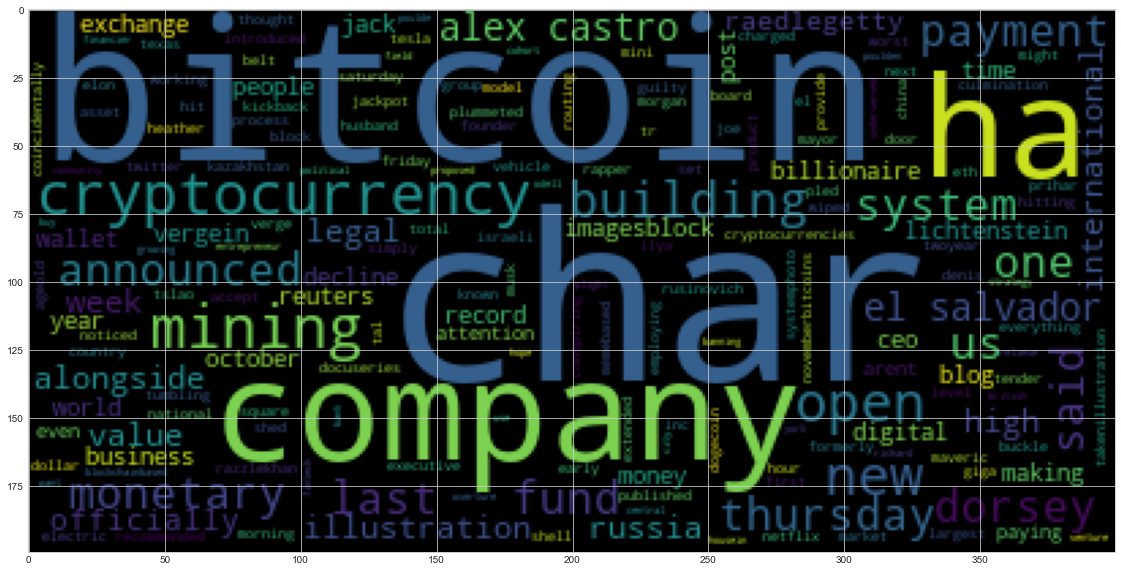

In [120]:
# Generate the Bitcoin word cloud
 # Generate wordcloud
wc = WordCloud().generate(input_text_btc)
plt.imshow(wc)

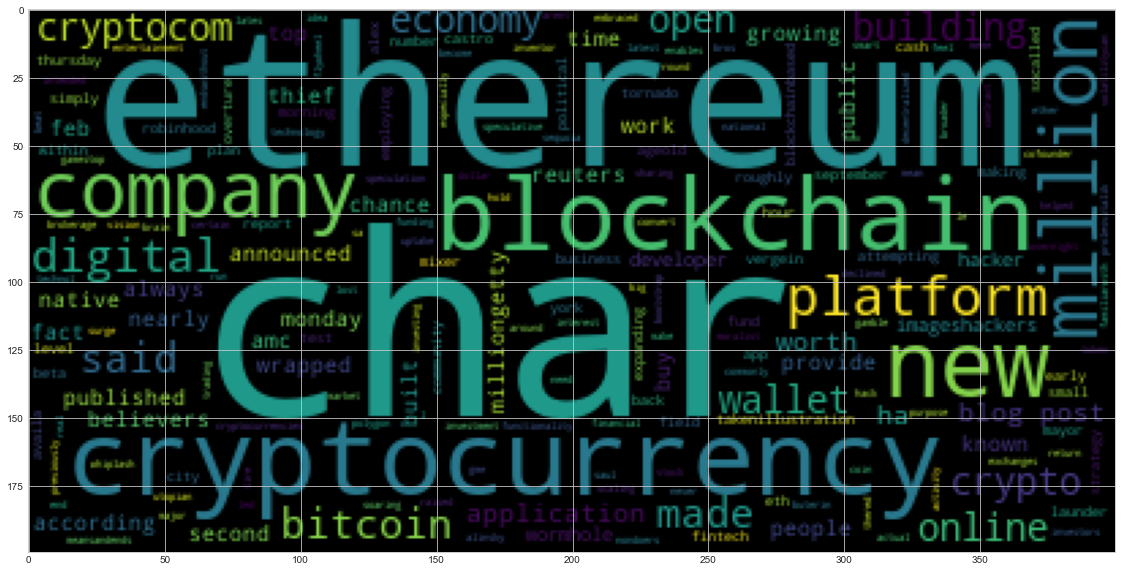

In [123]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(input_text_eth)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [124]:
import spacy
from spacy import displacy

In [125]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [126]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [128]:
# Concatenate all of the Bitcoin text together
input_text_btc

'even arent paying attention bitcoin cryptocurrencies might noticed value plummeted last week total value market tumbling high tr char denis rusinovich set cryptocurrency mining company maveric group kazakhstan thought hit jackpot next door china russia country everything bitcoin char el salvador introduced bitcoin legal tender alongside us dollar illustration alex castro verge international monetary funds executive board ha recommended el char officially building open bitcoin mining systemphoto joe raedlegetty imagesblock payment company formerly known square working building open bitcoin mining system char israeli national tal prihar pled guilty routing money kickback bitcoin shell company illustration alex castro vergein culmination twoyear legal process char new blog post company said eth bitcoin takenillustration alex castro vergein blog post published early hour thursday morning cryptocurrency char netflix making docuseries one worst rapper time coincidentally heather razzlekhan 

In [149]:
# Run the NER processor on all of the text
btc_doc = nlp(input_text_btc)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin Buzz Words"

In [150]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [142]:
# List all Entities
print([ent.text for ent in btc_doc.ents if ent.label_ == 'ORG' or 'GPE'])

['last week', 'kazakhstan', 'china', 'russia', 'el salvador', 'alex castro verge international', 'el char', 'israeli', 'alex castro vergein', 'alex castro vergein', 'early hour', 'thursday', 'morning', 'one', 'ilya lichtenstein', 'week', 'saturday', 'jack dorsey', 'first', 'october last year', 'friday', 'new york city', 'british', 'richard odell', 'october', 'thursday', 'russian', 'last five year', 'el salvador', 'el salvador', 'one', 'planetchangpeng', 'reuters', 'reuters us securities exchange commission', 'thursday', 'jack', 'one', 'tuesday', 'september']


---

### Ethereum NER

In [143]:
# Concatenate all of the Ethereum text together
input_text_eth

'new blog post company said eth bitcoin takenillustration alex castro vergein blog post published early hour thursday morning cryptocurrency char hackers made roughly million ethereum cryptocom attempting launder fund socalled ethereum mixer known tornado cash according new report char level new mayor simply employing ageold political strategy making overture business community fintech growing field new york city blockchainbased company char back september robinhood announced plan test cryptocurrency wallet within app time company said would open beta small number people expanding availa char people buy cryptocurrencies intended hold speculative investment thered real need crypto wallet exchanges online brokerage convert dollar sa char enables l platform bootstrap national economy time flywheel financial speculation around native token actual building application activity char trading platform cryptocom lost million worth cryptocurrency hack monday according new blog post company publi

In [147]:
# Run the NER processor on all of the text
eth_doc = nlp(input_text_eth)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum Buzz Words"

In [148]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [146]:
# List all Entities
print([ent.text for ent in eth_doc.ents if ent.label_ == 'ORG' or 'GPE'])

['new blog post', 'alex castro vergein', 'early hour', 'thursday', 'morning', 'roughly million', 'new york city', 'september', 'million', 'monday', 'reuters', 'polygon', 'monday', 'million', 'india', 'second', 'second', 'million', 'bloomberg tv', 'kris marszalek', 'british', 'richard odell', 'october', 'reuters', 'gmt friday']


---